# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

# Preprocessing the stock prices

In [4]:
stock_names = ['Apple','Netflix','Google']
# Define empty dataframe to store the stock closing prices
df = pd.DataFrame()
df_high = pd.DataFrame()
df_low = pd.DataFrame()
for stock in stock_names:
    # Read the stock closing prices with date as the index column.
    df[stock] = pd.read_csv(stock+'.csv',parse_dates= [0], index_col = 'date',skiprows = [1]).close
    df_high[stock] = pd.read_csv(stock+'.csv',parse_dates= [0], index_col = 'date',skiprows = [1]).high
    df_low[stock] = pd.read_csv(stock+'.csv',parse_dates= [0], index_col = 'date',skiprows = [1]).low
# Rearange the data in ascending chronological order
df = df.sort_index()
df_high = df_high.sort_index()
df_low = df_low.sort_index()
# Forward fill the missing holiday and weekend stock closing prices
df = df.resample('D').ffill()
df_high = df_high.resample('D').ffill()
df_low = df_low.resample('D').ffill()
# Log-transform the closing price data frame
df_log = np.log(df)
df_high_log = np.log(df_high)
df_low_log = np.log(df_low)
# Display first five five rows of the data frame
df_log.head()

,Apple,Netflix,Google
date,,,
2009-02-23,2.519421,1.625882,5.116364
2009-02-24,2.556677,1.639269,5.161938
2009-02-25,2.566709,1.631767,5.150848
2009-02-26,2.544857,1.631473,5.137707
2009-02-27,2.546206,1.644245,5.140106


# Mean Absolute Percentage Error

In [5]:
def MAPE(y_true,y_pred):
    """  input:
    y_true = True value of variables
    y_pred = predicted values of variable
    output:
    MAPE = mean absolute percentage error
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred) # make sure input is flat   
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Autocorrelation Plots of Original Data

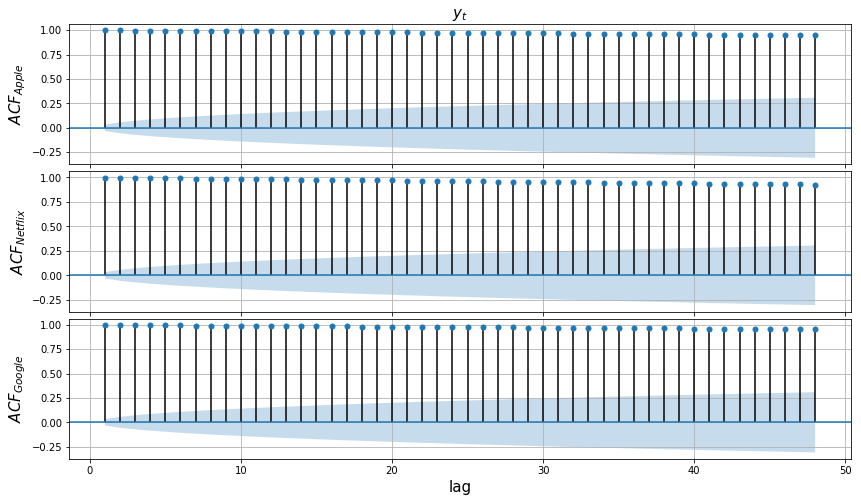

In [8]:
fig, axes = plt.subplots(3,1,sharex = True,figsize = (14,8))
lag = 48
for i in range(3):
    plot_acf(df.iloc[:,i],lags = lag, ax = axes[i], zero = False)
    axes[i].grid()
    axes[i].set_title('')
    axes[0].set_title(r'$y_t$', size = '15')
    axes[2].set_xlabel('lag', size = '15')
    axes[i].set_ylabel(r'$ACF_{%s}$'%stock_names[i], size = '15')
    
plt.subplots_adjust(wspace = 0.01, hspace = 0.05)
plt.show()

# Annual Variance of Original and Logged Time Series

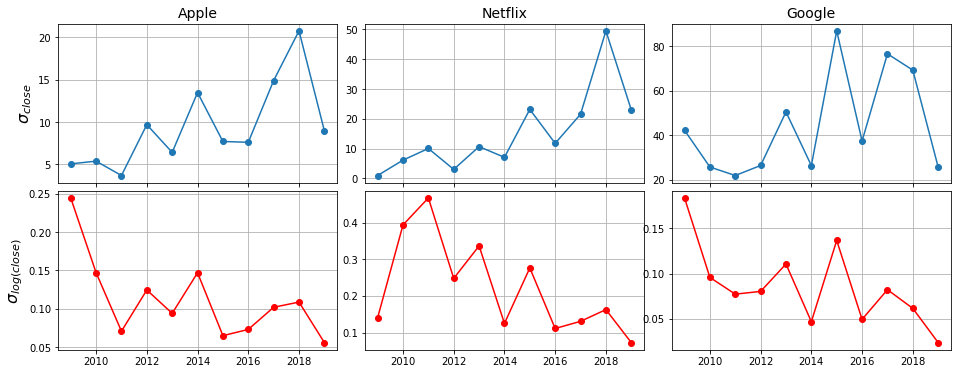

In [30]:
fig, axes = plt.subplots(2,3,sharex = True,figsize = (16,6))
for i in range(3):
    df_1 = df.groupby(lambda x: x.year)[stock_names[i]].agg(['std'])
    df_2 = df_log.groupby(lambda x: x.year)[stock_names[i]].agg(['std'])
    df_1.plot(ax = axes[0][i],marker = 'o',legend = False)
    axes[0][i].grid()
    axes[0][i].set_title(stock_names[i], size = '14')
    axes[0][0].set_ylabel(r'$\sigma_{close}$', size = '16')
    axes[1][0].set_ylabel(r'$\sigma_{log(close)}$', size = '16')
    df_2.plot(ax = axes[1][i],marker = 'o',legend = False, color = 'red')
    axes[1][i].grid()
plt.subplots_adjust(wspace = 0.1, hspace = 0.05)

# Autocorrelation Plots of Log-Transformed Data

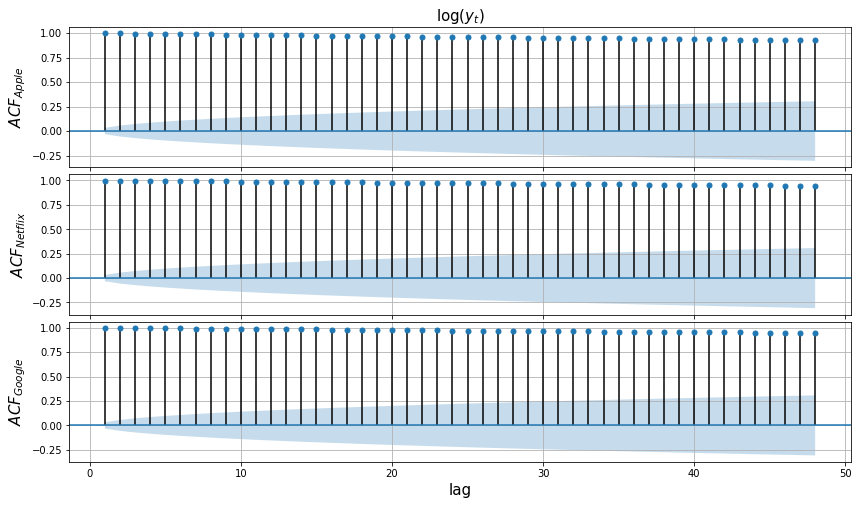

In [14]:
fig, axes = plt.subplots(3,1,sharex = True,figsize = (14,8))
lag = 48
for i in range(3):
    plot_acf(df_log.iloc[:,i],lags = lag, ax = axes[i], zero = False)
    axes[i].grid()
    axes[i].set_title('')
    axes[0].set_title(r'$\log(y_t)$', size = '15')
    axes[2].set_xlabel('lag', size = '15')
    axes[i].set_ylabel(r'$ACF_{%s}$'%stock_names[i], size = '15')
    
plt.subplots_adjust(wspace = 0.01, hspace = 0.05)
plt.show()

# Autocorrelation Plots of Differenced Time Series

In [ ]:
df_diff = df_log-df_log.shift()
df_diff = df_diff.dropna()

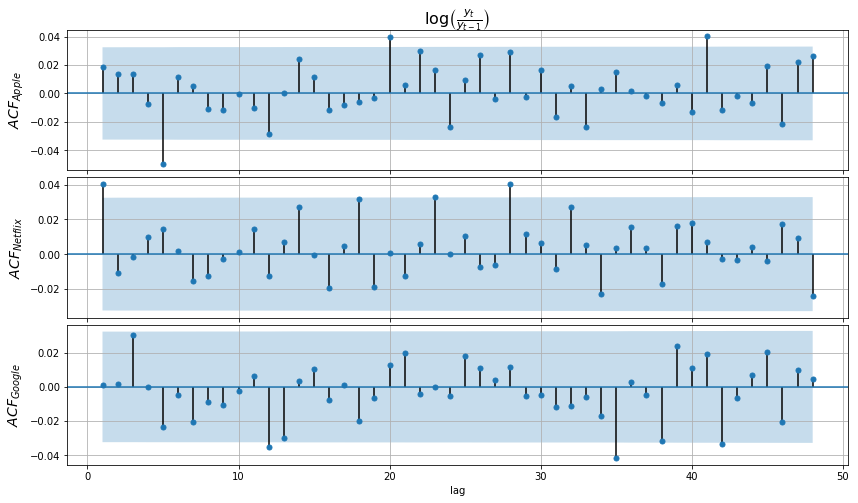

In [31]:
fig, axes = plt.subplots(3,1,sharex = True,figsize = (14,8))
lag = 48
for i in range(3):
    plot_acf(df_diff.iloc[:,i],lags = lag, ax = axes[i], zero = False)
    axes[i].grid()
    axes[i].set_title('')
    axes[0].set_title(r'$\log\left(\frac{y_t}{y_{t-1}}\right)$', size = '16')
    axes[2].set_xlabel('lag')
    axes[i].set_ylabel(r'$ACF_{%s}$'%stock_names[i], size = '14')
    
plt.subplots_adjust(wspace = 0.01, hspace = 0.05)
plt.show()

# Annual Variance of Original, Logged & Differenced Time Series

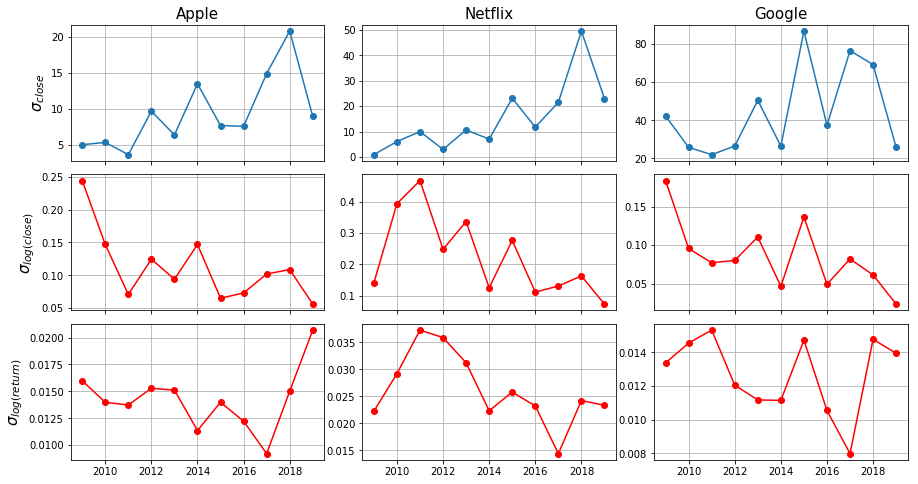

In [29]:
fig, axes = plt.subplots(3,3,sharex = True,figsize = (15,8))
for i in range(3):
    df_1 = df.groupby(lambda x: x.year)[stock_names[i]].agg(['std'])
    df_2 = df_log.groupby(lambda x: x.year)[stock_names[i]].agg(['std'])
    df_3 = df_diff.groupby(lambda x: x.year)[stock_names[i]].agg(['std'])
    df_1.plot(ax = axes[0][i],marker = 'o',legend = False)
    axes[0][i].grid()
    axes[0][i].set_title(stock_names[i], size = '15')
    axes[0][0].set_ylabel(r'$\sigma_{close}$', size = '15')
    axes[1][0].set_ylabel(r'$\sigma_{log(close)}$', size = '15')
    axes[2][0].set_ylabel(r'$\sigma_{log(return)}$', size = '15')
    df_2.plot(ax = axes[1][i],marker = 'o',legend = False, color = 'red')
    axes[1][i].grid()
    df_3.plot(ax = axes[2][i],marker = 'o',legend = False, color = 'red')
    axes[2][i].grid()
plt.subplots_adjust(wspace = 0.15, hspace = 0.1)

# ADF Unit Root Test

In [34]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries,maxlag=30,regression = 'ctt')#, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic','p-value','#Lags','#Observations'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

#print('Original Series')
df1O = adf_test(df.Apple)
df2O = adf_test(df.Netflix)
df3O = adf_test(df.Google)
df_adfO = pd.concat([df1O,df2O,df3O], axis = 1)
df_adfO.columns = [s + '_Org' for s in stock_names]

#print('Log-Transformed Series')
df1L = adf_test(df_log.Apple)
df2L = adf_test(df_log.Netflix)
df3L = adf_test(df_log.Google)
df_adfL = pd.concat([df1L,df2L,df3L], axis = 1)
df_adfL.columns = [s + '_Log' for s in stock_names]

#print('Log Return Series')
df1R = adf_test(df_diff.Apple)
df2R = adf_test(df_diff.Netflix)
df3R = adf_test(df_diff.Google)
df_adfR = pd.concat([df1R,df2R,df3R], axis = 1)
df_adfR.columns = [s + '_log_Return' for s in stock_names]
df_ADF = pd.concat([df_adfO,df_adfL,df_adfR],axis = 1)

df_ADF

,Apple_Org,Netflix_Org,Google_Org,Apple_Log,Netflix_Log,Google_Log,Apple_log_Return,Netflix_log_Return,Google_log_Return
ADF Statistic,-3.523955,-3.174823,-3.857433,-3.464628,-2.284832,-3.991126,-28.206045,-58.007490,-60.405692
p-value,0.106977,0.218932,0.046790,0.122127,0.687538,0.032315,0.000000,0.000000,0.000000
#Lags,30.000000,20.000000,13.000000,5.000000,1.000000,0.000000,4.000000,0.000000,0.000000
#Observations,3621.000000,3631.000000,3638.000000,3646.000000,3650.000000,3651.000000,3646.000000,3650.000000,3650.000000
Critical Value (1%),-4.374333,-4.374324,-4.374318,-4.374311,-4.374308,-4.374307,-4.374311,-4.374308,-4.374308
Critical Value (5%),-3.834022,-3.834017,-3.834014,-3.834011,-3.834009,-3.834008,-3.834011,-3.834009,-3.834009
Critical Value (10%),-3.554271,-3.554268,-3.554266,-3.554264,-3.554263,-3.554263,-3.554264,-3.554263,-3.554263


# Autocorrelation Intergrated Moving Average Model

===================================Apple====================================
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3629
Model:                 ARIMA(0, 1, 0)   Log Likelihood               10380.106
Method:                           css   S.D. of innovations              0.014
Date:                Mon, 03 Jun 2019   AIC                         -20756.212
Time:                        22:41:42   BIC                         -20743.819
Sample:                             1   HQIC                        -20751.797
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      3.110      0.002       0.000       0.001

===================================Netflix===========

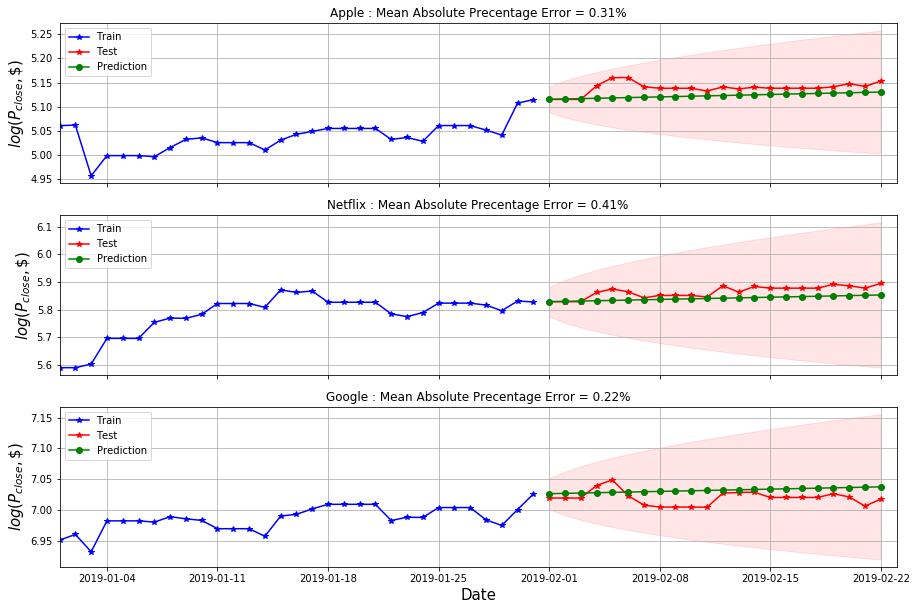

In [40]:
train =  df_log.loc[:'2019-01-31',:]
test =  df_log.loc['2019-02-01':,:]
# Initialize the subplots
fig, axs = plt.subplots(3,1, figsize=(15, 10), facecolor='w', edgecolor='k',sharex = True)
for i in range(3):
    # Run auto arima model
    model = auto_arima(train.iloc[:,i], start_p=0, start_q=0,max_p=3, max_q=0,
                          m=7, d=1,seasonal=False,start_P=0,D=0, 
                          trace=False, error_action='ignore',  
                          suppress_warnings=True,stepwise=True)#
    print('==================================={}===================================='.format(stock_names[i]))
    print(model.summary())
    print('')
    #model.plot_diagnostics(figsize = (15,7))

    predictions, confinterval = model.predict(n_periods=len(test), return_conf_int=True)
    pred_fit = pd.Series(predictions, index=test.index)
    llimit = pd.Series(confinterval[:, 0], index=test.index)
    ulimit = pd.Series(confinterval[:, 1], index=test.index)
    axs[i].plot(train.loc['2019-01-01':,stock_names[i]],color = 'blue', marker = '*')
    axs[i].plot(test.loc['2019-01-01':,stock_names[i]],color = 'red', marker = '*')#
    axs[i].plot(pred_fit, color='green', marker = 'o')
    axs[i].fill_between(llimit.index,llimit,ulimit, color='r', alpha=.1)

    axs[i].set_title('{} : Mean Absolute Precentage Error = {}%'.format(stock_names[i],np.around(MAPE(test.iloc[:,i],predictions),2)))
    axs[i].grid()
    axs[2].set_xlabel('Date',size = '15')
    axs[i].set_ylabel(r'$log(P_{close} ,\$ $)', size = '15')
    axs[i].legend(['Train','Test','Prediction'],loc = 'upper left')
    axs[i].set_xlim(['2019-01-01','2019-02-23'])
plt.show()